# Predicting heart disease using machine learning - PROJECT

**(c) 2023 Kamil Stachurski**

I'am going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimention

## 1. Problem Definition

In a statement:
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleveland database from UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If I can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, I'll pursue the project.

## 4. Features

You can find information about each data in `README.md` file.

### Preparing tools

I'm going to use pandas, matplotlib and NumpPy for data analysis and manipulation.

In [62]:
# Regular EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

# Feature importance
from sklearn.inspection import permutation_importance
import time

### Load data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/KamRoki/Heart-Disease-Classification/master/heart-disease.csv')
df.shape # (rows, columns)

(303, 14)

### Exploratory Data Analysis EDA

1. What question(s) am I trying to solve?
2. What kind of data do I have and how do I treat different types?
3. What's missing from the data and how do I deal with it?
4. Where are the outliers and why should I care about them?
5. How can I add, change or remove features to get more out of my data?

In [3]:
# Let's see head of my DataFrame
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Now let's find out how many of each class there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

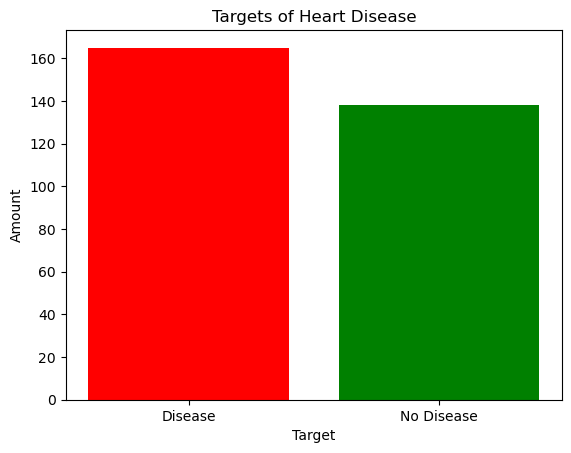

In [5]:
# Visualize amount of each class
fig, ax = plt.subplots();
ax.bar(['Disease', 'No Disease'],
       df.target.value_counts(),
       color = ['red', 'green']);
ax.set(title = 'Targets of Heart Disease',
       xlabel = 'Target',
       ylabel = 'Amount');

In [6]:
# What kind of data I have?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Let's describe each column of DataFrame
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease vs Sex

In [9]:
# Amount of sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column
pd.crosstab(df.target,
            df.sex)

sex,0,1
target,,
0,24,114
1,72,93


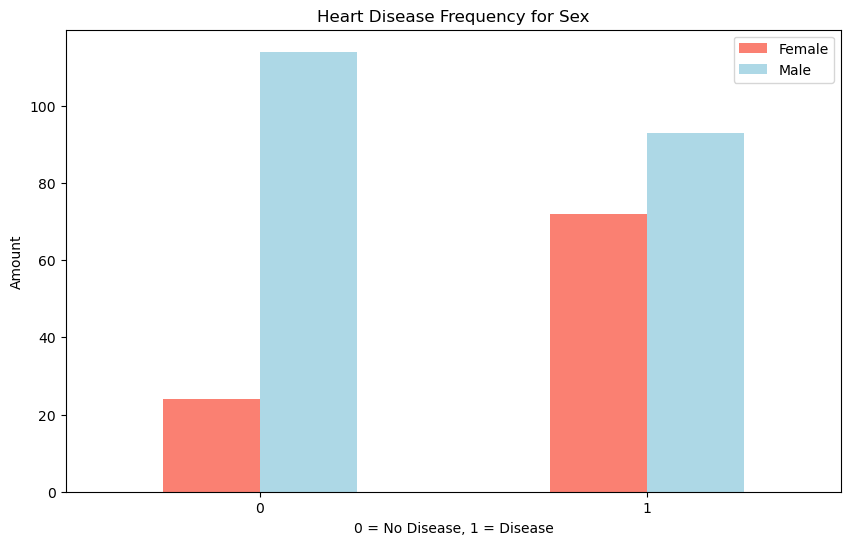

In [11]:
# Visualize crosstab
pd.crosstab(df.target, df.sex).plot(kind = 'bar',
                                    figsize = (10, 6),
                                    color = ['salmon', 'lightblue']);
plt.title('Heart Disease Frequency for Sex');
plt.xlabel('0 = No Disease, 1 = Disease');
plt.ylabel('Amount');
plt.legend(['Female', 'Male']);
plt.xticks(rotation = 0);

### Age and Max Heart Rate for Heart Disease

In [12]:
# Amount of Max Heart Rate
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

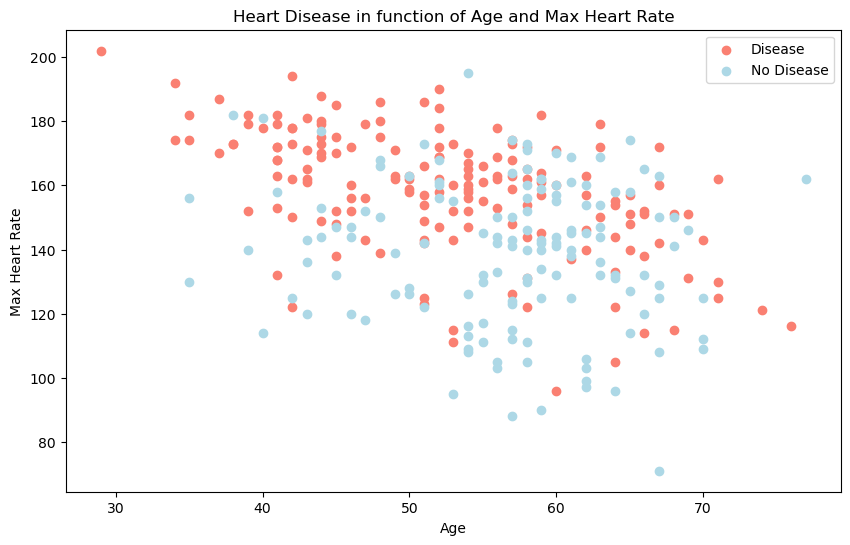

In [13]:
# Let's visualize it
plt.figure(figsize = (10, 6))
# Scatter with positives
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = 'salmon');
# Scatter with negatives
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = 'lightblue');
# Add some info
plt.title('Heart Disease in function of Age and Max Heart Rate');
plt.xlabel('Age');
plt.ylabel('Max Heart Rate');
plt.legend(['Disease', 'No Disease']);

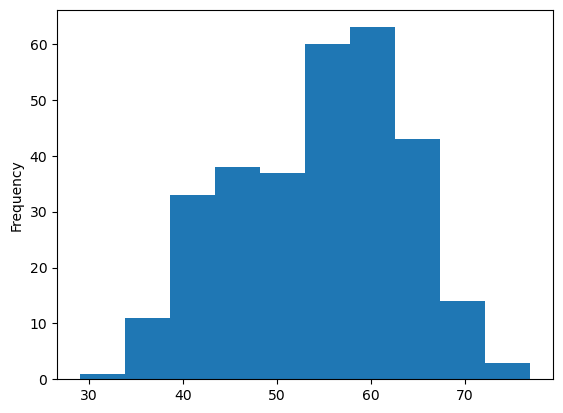

In [14]:
# Check the distribution of the age
df.age.plot.hist(bins = 10);

### Heart Disease frequency per Chest Pain Type

In [15]:
# Let's create crosstab of cp and target
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


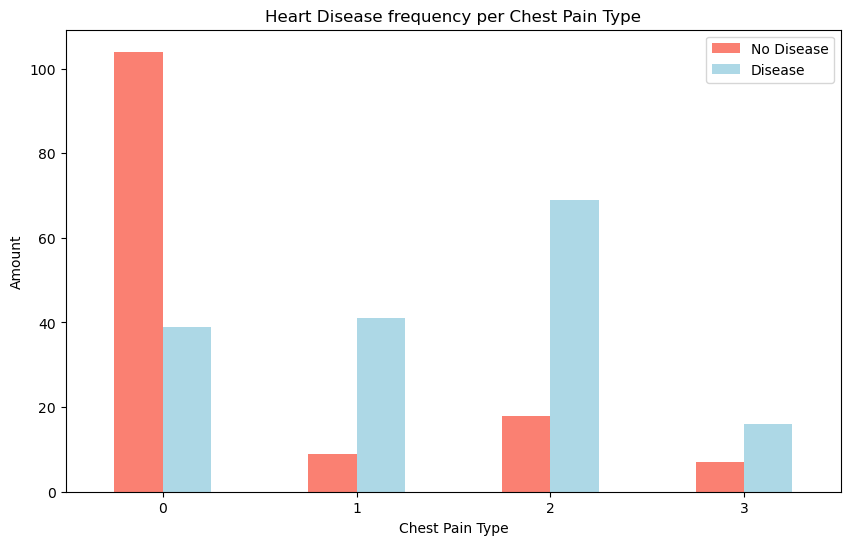

In [16]:
# Make more visual
pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                   figsize = (10, 6),
                                   color = ['salmon', 'lightblue']);
# Add info
plt.title('Heart Disease frequency per Chest Pain Type');
plt.xlabel('Chest Pain Type');
plt.ylabel('Amount');
plt.legend(['No Disease', 'Disease']);
plt.xticks(rotation = 0);

### Correlation Matrix

In [17]:
# Create correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


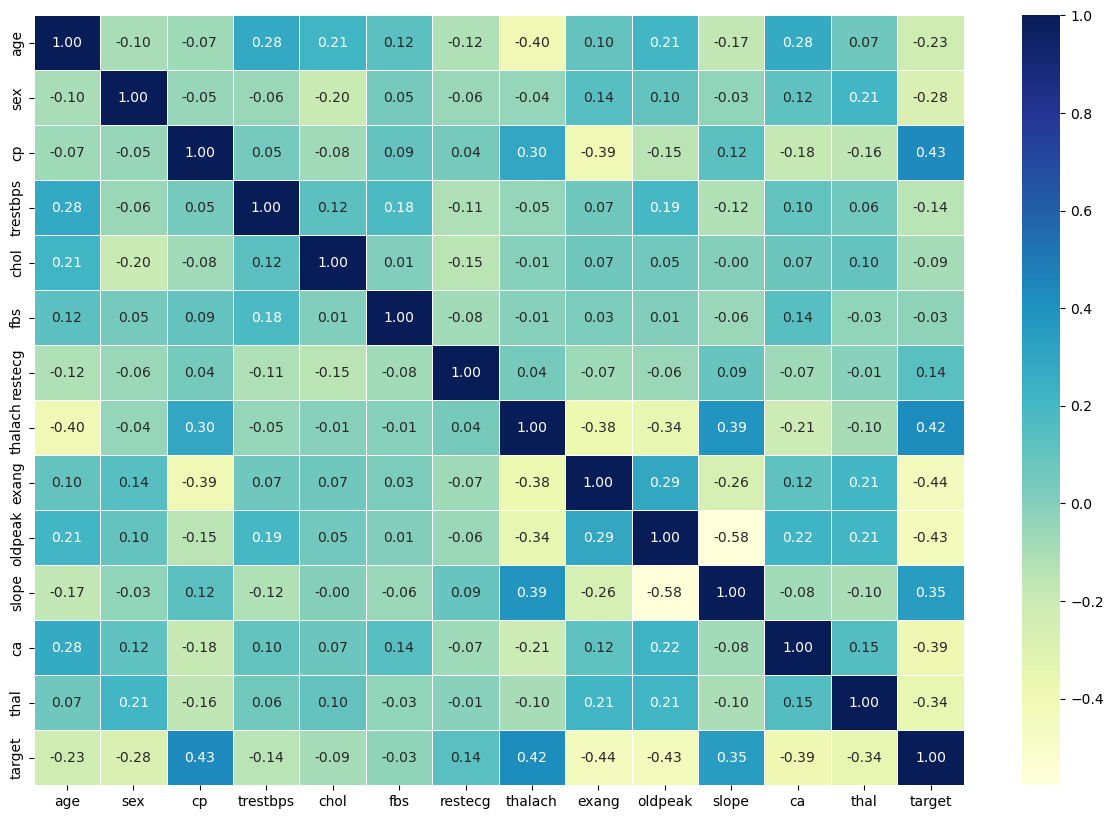

In [18]:
# Let's make correlation matrix more prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = '.2f',
                 cmap = 'YlGnBu');

## 5. Modelling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Set seed
np.random.seed(24)

In [21]:
# Split data into X and y
X = df.drop('target', axis = 1)
y = df['target']

In [22]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2)

I'm going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [23]:
# Put all models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Define function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Function which fit and evaluate given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data
    X_test: testing data
    y_train: training labels
    y_test: testing labels
    '''
    # Set seed
    np.random.seed(24)
    # Make dictionary to keep model scores
    model_scores = {}
    # Loop
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [24]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
pd.DataFrame(model_scores, index = [0])

/Users/kamil/heart-disease-project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Logistic Regression,KNN,Random Forest
0,0.868852,0.672131,0.868852


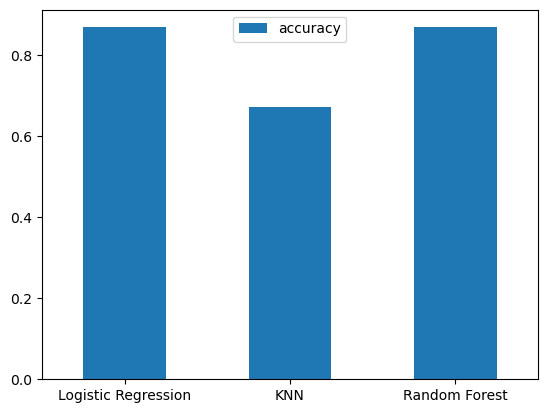

In [25]:
# Let's comparison models
model_compare = pd.DataFrame(model_scores,
                             index = ['accuracy'])
model_compare.T.plot.bar();
plt.xticks(rotation = 0);

## 6. Experimention

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1-Score
* Classification report
* ROC curve
* Area under the curve AUC

### Hyperparameter tuning of K-Neighbors Classifier

In [26]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a lsit of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [27]:
train_scores

[1.0,
 0.7892561983471075,
 0.7851239669421488,
 0.7520661157024794,
 0.7272727272727273,
 0.71900826446281,
 0.7024793388429752,
 0.7148760330578512,
 0.71900826446281,
 0.7107438016528925,
 0.7148760330578512,
 0.7148760330578512,
 0.6983471074380165,
 0.6859504132231405,
 0.6942148760330579,
 0.6735537190082644,
 0.7066115702479339,
 0.6983471074380165,
 0.7024793388429752,
 0.6776859504132231]

In [28]:
test_scores

[0.6721311475409836,
 0.5901639344262295,
 0.6557377049180327,
 0.6229508196721312,
 0.6721311475409836,
 0.639344262295082,
 0.639344262295082,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.6885245901639344,
 0.6721311475409836,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361]

Maximum KNN score on the test data: 72.13%


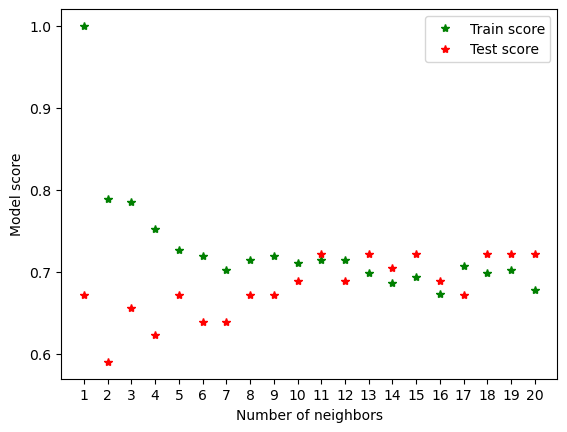

In [29]:
plt.plot(neighbors, train_scores, 'g*', label = 'Train score');
plt.plot(neighbors, test_scores, 'r*', label = 'Test score');
plt.xticks(np.arange(1, 21, 1));
plt.xlabel('Number of neighbors');
plt.ylabel('Model score');
plt.legend();

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

### Hyperparameter tuning with `RandomizedSearchCV`

Let's tune:
* `LogisticRegression()`
* `RandomForestClassifier()`

In [30]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear'],
    'penalty': ['l2', 'l1']
}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

In [31]:
# Tune LogisticRegression
np.random.seed(24)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l2', 'l1'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
# Best params of LogisticRegresion
pd.DataFrame(rs_log_reg.best_params_, index = [1])

,solver,penalty,C
1,liblinear,l1,11.288379


In [33]:
# Score of tuned LogisticRegression()
print(f'Score RandomizedSearch CV of LogisticRegresison: {rs_log_reg.score(X_test, y_test)}')

Score RandomizedSearch CV of LogisticRegresison: 0.8524590163934426


In [34]:
# Tune RandomForestClassifier
np.random.seed(24)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
# Best params of RandomForestClassifier
pd.DataFrame(rs_rf.best_params_, index = [1])

,n_estimators,min_samples_split,min_samples_leaf,max_depth
1,560,2,11,None


In [36]:
# Score of tuned RandomForestClassifier
print(f'Score RandomizedSearchCV of RandomForestClassifier: {rs_rf.score(X_test, y_test)}')

Score RandomizedSearchCV of RandomForestClassifier: 0.8852459016393442


The best accuracy is in `RandomForestClassifier`...

### Hyperparameter tuning with `GridSearchCV`

In [37]:
# Let's create different hyperparameter for my RandomForestClassifier model
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [4],
    'min_samples_leaf': [12]
}

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rf_grid,
                     cv = 5,
                     verbose = True)

# Fit grid hyperparameter search model
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [12], 'min_samples_split': [4],
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=True)

In [38]:
# Best params of RandomForestClassifier
pd.DataFrame(gs_rf.best_params_, index = [1])

,max_depth,min_samples_leaf,min_samples_split,n_estimators
1,None,12,4,460


In [39]:
# Score of tuned RandomForestClassifier
print(f'Score GridSearchCV of RandomForestClassifier: {gs_rf.score(X_test, y_test)}')

Score GridSearchCV of RandomForestClassifier: 0.8688524590163934


In [40]:
# Set hyperparameters obtained in GridSearchCV
clf = RandomForestClassifier(n_estimators = 60,
                             max_depth = 3,
                             min_samples_split = 4,
                             min_samples_leaf = 12)

# Fit the model
clf.fit(X_train, y_train)

# Score the tuned model
clf.score(X_test, y_test)

0.8688524590163934

### Evaluating RandomRorestClassifier model
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-Score

***ROC Curve and AUC Score***

In [41]:
# Make prediction with tuned model
y_preds = clf.predict(X_test)

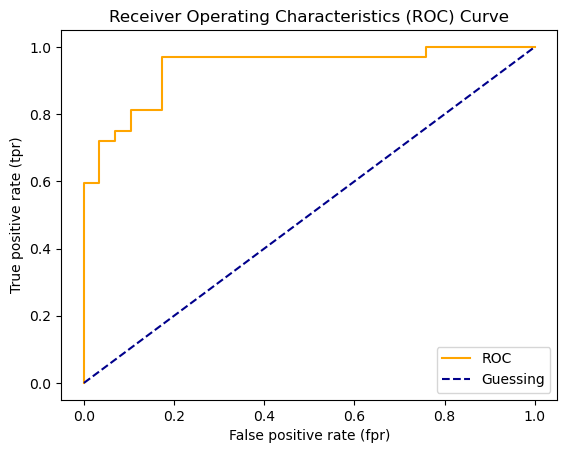

In [42]:
# Plot ROC curve and calculate AUC metric

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs_positive = y_probs[:, 1]
# Calculate fpr, tpr, and thresholds
fpr, tpr, thewsholds = roc_curve(y_test, y_probs_positive)

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    '''
    # Plot ROC curve
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    # Plot line with no predictive power
    plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristics (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr =fpr,
               tpr = tpr)

In [43]:
# AUC Value
auc = roc_auc_score(y_test, y_probs_positive)
print(f'AUC Value of RandomForestClasisfier model: {auc}')

AUC Value of RandomForestClasisfier model: 0.9364224137931034


***Confusion matrix***

In [44]:
# Create confusion matrix
print(confusion_matrix(y_test, y_preds))

[[22  7]
 [ 1 31]]


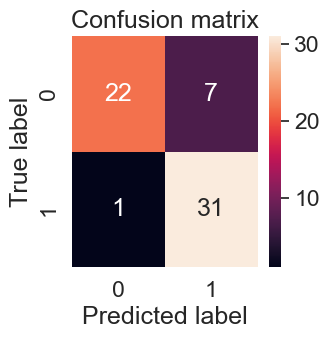

In [45]:
# Visualize confusion matrix
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots of confusion matrix using Seaborn's heatmap.
    '''
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = True)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

plot_conf_mat(y_test, y_preds)

***Classification report***

In [46]:
# Print classification report without class-validation
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85        29
           1       0.82      0.97      0.89        32

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.87        61
weighted avg       0.88      0.87      0.87        61



***Calculate evaluation metrics using cross-validation***

In [47]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y, 
                         cv = 5,
                         scoring = 'accuracy')
cv_acc = np.mean(cv_acc)
print(f'Cross-validated accuracy: {cv_acc}')

Cross-validated accuracy: 0.8249726775956285


In [48]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y, 
                         cv = 5,
                         scoring = 'precision')
cv_precision = np.mean(cv_precision)
print(f'Cross-validated precision: {cv_precision}')

Cross-validated precision: 0.8322707322707321


In [49]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y, 
                         cv = 5,
                         scoring = 'recall')
cv_recall = np.mean(cv_recall)
print(f'Cross-validated recall: {cv_recall}')

Cross-validated recall: 0.8909090909090909


In [50]:
# Cross-validated F1-Score
cv_f1 = cross_val_score(clf,
                         X,
                         y, 
                         cv = 5,
                         scoring = 'f1')
cv_f1 = np.mean(cv_f1)
print(f'Cross-validated F1-Score: {cv_f1}')

Cross-validated F1-Score: 0.8516780393159369


In [52]:
# Let's create DataFrame
cv_metrics_pd = pd.DataFrame({
    'Cross-validated Accuracy': cv_acc,
    'Cross-validated Precision': cv_precision,
    'Cross-validated Recall': cv_recall,
    'Cross-validated F1-Score': cv_f1
}, index = [1])
cv_metrics_pd

,Cross-validated Accuracy,Cross-validated Precision,Cross-validated Recall,Cross-validated F1-Score
1,0.824973,0.832271,0.890909,0.851678


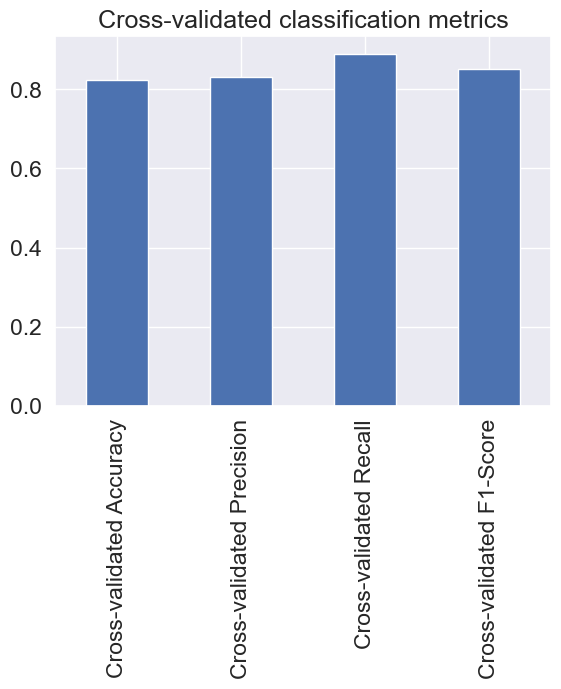

In [56]:
# Visualize cross-validated metrics
cv_metrics_pd.T.plot.bar(title = 'Cross-validated classification metrics',
                       legend = False);
#plt.xticks(rotation = 0)

### Feature Importance

In [78]:
# Let's create feature importance based on feature permutation
importances = clf.feature_importances_
forest_importances = pd.Series(importances, index = X.columns)
forest_importances

age         0.034125
sex         0.018078
cp          0.187175
trestbps    0.016094
chol        0.031379
fbs         0.000000
restecg     0.001693
thalach     0.087513
exang       0.073032
oldpeak     0.168174
slope       0.056783
ca          0.105194
thal        0.220760
dtype: float64

Text(0, 0.5, 'Mean decrease in impurity')

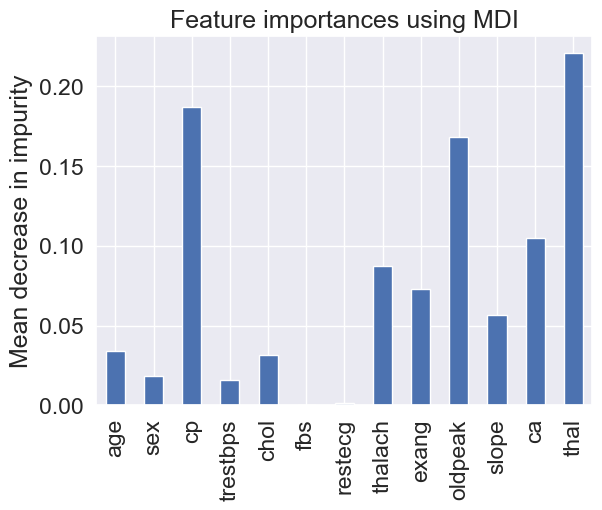

In [82]:
# Let's visualize feature importance
fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

## Note:
In feature, let's try:
* Collect more data
* Try another model like CatBoos or XGBoost
* Improve this model